In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('historical_automobile_sales.csv')
df

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523,8/31/2023,2023,Aug,0,103.36,0.25,27852.993,1793,6,57.169,0.764155,2.6,1579.6,Executivecar,New York
524,9/30/2023,2023,Sep,0,101.55,0.07,21183.704,1028,5,59.315,0.036180,2.5,1123.4,Smallfamiliycar,California
525,10/31/2023,2023,Oct,0,124.66,0.12,15975.589,1148,9,19.472,-2.046169,2.5,1685.9,Sports,California
526,11/30/2023,2023,Nov,0,97.09,0.25,16862.288,4850,5,27.904,0.302179,2.9,2124.6,Smallfamiliycar,Georgia


In [ ]:
sales=df.groupby('Year')['Automobile_Sales'].sum()

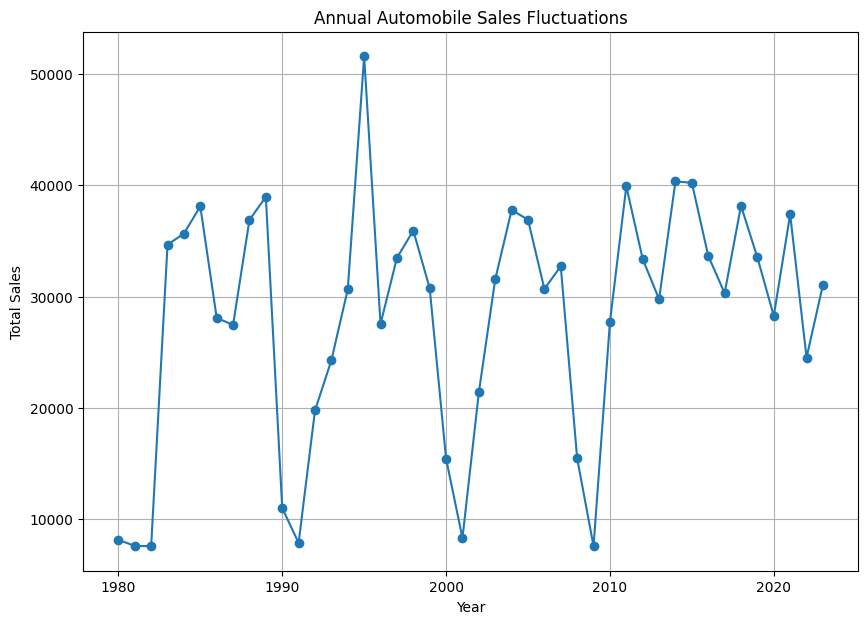

In [ ]:
#Q 1: Develop a Line chart using the functionality of pandas to show how automobile sales fluctuate from year to year.
plt.figure(figsize=(10,7))

sales.plot(kind='line',marker='o')
plt.title('Annual Automobile Sales Fluctuations')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()


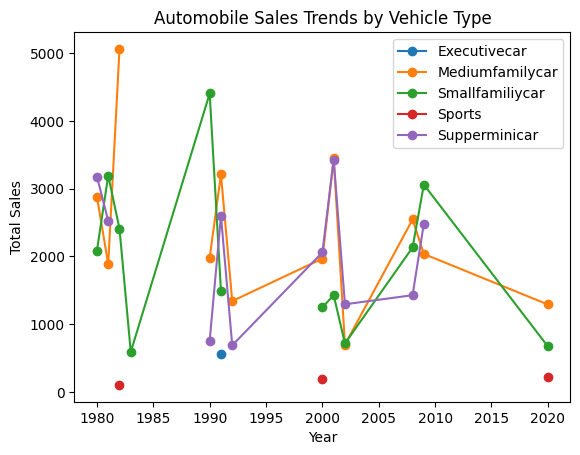

In [ ]:
#Q 2: Plot different lines for categories of vehicle type and analyze the trend to answer the question Is there a noticeable difference in sales trends between different vehicle types during recession periods? 
recession_data=df[df['Recession']==1]
vehicle_sales = recession_data.groupby(['Year','Vehicle_Type'])['Automobile_Sales'].sum().unstack()
# unstack() reshapes the data so we get one column for each Vehicle_Type — making it easy to compare all vehicle types on one plot, it is used When data is grouped by two or more categories. 
vehicle_sales.plot(kind='line',marker='o')
plt.title('Automobile Sales Trends by Vehicle Type')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.legend()
plt.show()

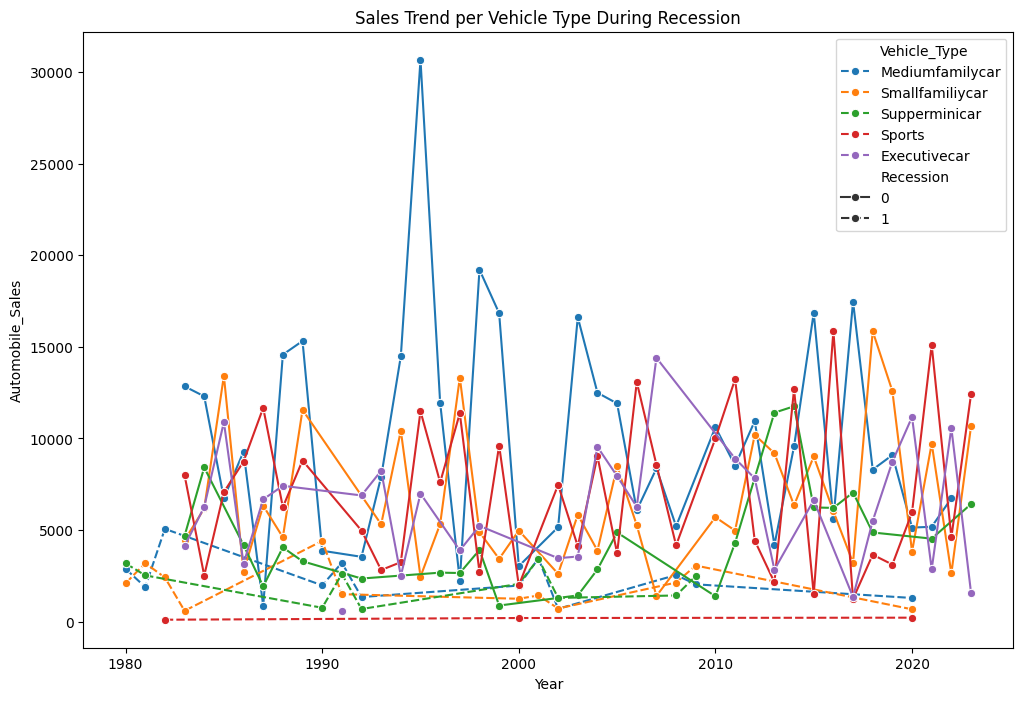

In [ ]:
#Q 3: Use the functionality of Seaborn Library to create a visualization to compare the sales trend per vehicle type for a recession period with a non- recession period. 

recession_sales=df.groupby(['Year','Vehicle_Type','Recession'])['Automobile_Sales'].sum().reset_index()
plt.figure(figsize=(12,8))

sns.lineplot(data=recession_sales, x='Year', y='Automobile_Sales', hue='Vehicle_Type',marker='o',linestyle='dashed',style='Recession')
plt.title('Sales Trend per Vehicle Type During Recession')
plt.show()


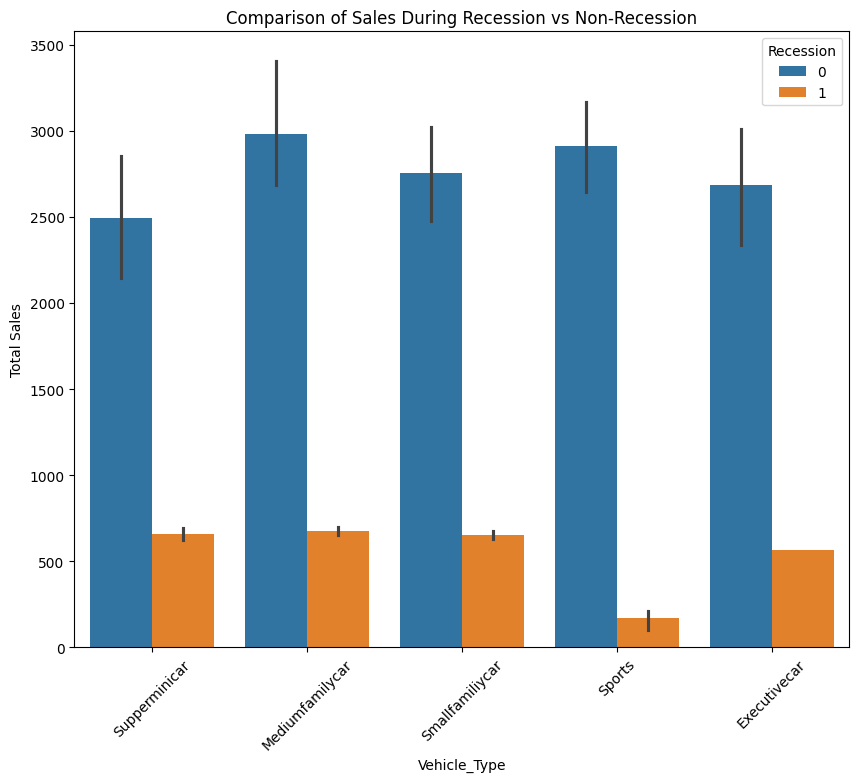

In [ ]:
#Q 4: Now you want to compare the sales of different vehicle types during a recession and a non-recession period 
plt.figure(figsize=(10,8))
sns.barplot(data=df,x='Vehicle_Type',y='Automobile_Sales',hue='Recession')
plt.title('Comparison of Sales During Recession vs Non-Recession')
plt.xticks(rotation=45)
plt.ylabel('Total Sales')
plt.show()